In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
df = pd.read_csv('data/NCI60_X.csv',index_col=0)
df.head(10)

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,-0.990020,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000
V6,0.310000,-0.030000,-0.100000,-0.460000,-0.205000,-5.400000e-01,-0.640000,-0.585000,-0.770000,-0.244980,...,-0.590020,0.000000,-0.740000,-2.095000,-1.390020,-0.400000,0.699990,0.290000,0.550000,0.000000
V7,-0.830000,0.000000,0.130000,-1.630000,0.075000,-3.600000e-01,0.100000,0.155000,-0.290000,-0.084981,...,0.189980,-0.220000,-0.030000,-0.495000,0.929980,0.470000,0.129990,-0.300000,0.570000,0.000000
V8,-0.190000,-0.870000,-0.450000,0.080000,0.005000,3.500000e-01,-0.040000,-0.265000,-0.310000,-0.244980,...,-0.210019,-0.170000,-0.420000,-0.395000,-0.570020,-0.090000,-0.700010,-0.540000,-0.450000,-2.090000
V9,0.460000,0.000000,1.150000,-1.400000,-0.005000,-7.000000e-01,-0.920000,-0.515000,-0.280000,-0.114980,...,0.089980,0.560000,0.410000,0.705000,-0.200019,-0.330000,-0.600010,0.830000,-0.030000,0.650000
V10,0.760000,1.490000,0.280000,0.100000,-0.525000,3.600000e-01,0.600000,0.175000,0.580000,1.145019,...,0.299980,-0.590000,-0.410000,-0.375000,-1.150020,-0.330000,-1.220010,-0.170000,-0.110000,-1.790000


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64 entries, V1 to V64
Columns: 6830 entries, 1 to 6830
dtypes: float64(6830)
memory usage: 3.3+ MB


In [151]:
x_raw = df.copy()

In [152]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Standard scaling all columns

In [153]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_raw)

creating 4 kmeans clusters

In [154]:
kmc = KMeans(n_clusters=4)
kmc.fit(x_scaled)

KMeans(n_clusters=4)

creating 4 agglomerative clusters

In [155]:
agg = AgglomerativeClustering(n_clusters=4)
agg.fit(x_scaled)

AgglomerativeClustering(n_clusters=4)

In [156]:
kmc_score = silhouette_score(x_scaled, kmc.labels_, metric = 'euclidean')
agg_score = silhouette_score(x_scaled, agg.labels_, metric = 'euclidean')

In [157]:
from sklearn.decomposition import PCA

Reducing features to 25 principal components

In [158]:
pca = PCA(n_components=25)
x_scaled_pca = pca.fit_transform(x_scaled)

In [159]:
scaled_pca_df = pd.DataFrame(x_scaled_pca)
scaled_pca_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-19.838111,-3.554287,-9.811852,-0.827061,12.609221,7.451754,14.186339,-3.165312,21.846397,-20.429707,...,-6.209009,20.743963,8.591917,-6.959235,-7.057294,-9.290318,-5.238677,11.443667,12.808845,-8.577089
1,-23.089374,-6.440977,-13.475698,5.646832,8.036718,3.678663,10.167446,-7.318675,22.135780,-13.186443,...,5.447561,18.698147,6.197272,-7.457710,-19.972285,0.921412,-9.550453,3.256051,11.470639,-6.775309
2,-27.455994,-2.466090,-3.535109,-1.348750,12.577320,17.369135,10.355218,-2.727666,-0.072438,-6.231953,...,-7.783066,13.458360,-1.607520,4.293331,-5.520543,-0.821998,6.134348,-5.222988,0.749286,-6.576680
3,-42.816835,9.769095,-0.887602,3.455684,42.263061,27.198915,17.547414,-0.641279,14.192423,16.062769,...,-21.159721,-2.391246,2.173858,-3.329575,0.957713,3.845384,-17.906130,6.311221,-15.609498,5.686565
4,-55.418529,5.199214,-21.096794,15.855431,10.434387,12.997529,12.595744,32.538864,-7.854008,-10.223000,...,-4.985813,-21.961348,-16.058883,3.712254,-5.370708,5.215408,9.082794,4.634217,-11.895823,-17.744228
5,-27.177933,-6.780732,-21.815723,13.838056,-7.994441,0.741205,27.991350,31.318366,-10.720141,2.385679,...,-17.180898,-2.422129,5.411150,5.125904,30.515760,-5.989301,-9.089400,-6.608131,1.983820,28.131031
6,-31.445967,-3.865751,-30.353769,41.667171,-10.414190,-17.006308,23.718054,-1.011534,14.238240,-7.551924,...,14.197674,-17.149842,-6.213250,-13.819242,-10.431595,-10.634184,2.394362,10.425276,6.927214,9.026368
7,-22.332390,-10.398713,-18.757163,6.953622,5.533688,11.738656,11.791458,22.802432,-3.753977,-4.924078,...,9.938673,16.287308,-7.017880,1.410462,10.505695,30.110039,-5.833190,-2.518644,-16.744103,-9.678662
8,-14.289832,-16.113140,-19.759364,6.556377,3.782697,-7.970425,-13.111430,7.167338,1.056624,-7.783114,...,-5.704395,-0.544142,-6.462844,-0.688619,5.610562,-7.692072,16.872318,0.620247,2.173008,-10.181983
9,-29.747989,-23.993825,-5.886799,-10.021821,-3.472316,11.724283,0.533040,7.993090,-19.834952,-27.865847,...,12.327798,-4.900896,39.501255,16.981565,-9.107312,19.024939,26.062537,-5.354433,7.167267,13.004230


In [160]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.11358942 0.06756202 0.05751842 0.04247553 0.03734963 0.03618588
 0.03066203 0.0268584  0.02528746 0.02375513 0.02356087 0.02163936
 0.02048831 0.01978172 0.01913591 0.01770795 0.01660443 0.01605266
 0.01591858 0.01550023 0.0150464  0.01476359 0.01432125 0.01355961
 0.01317172]
0.7184965177925895


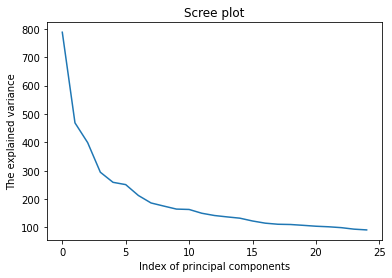

In [161]:
ax = sns.lineplot(pca.explained_variance_)
ax.set_title("Scree plot")
ax.set_xlabel("Index of principal components")
ax.set_ylabel("The explained variance")
plt.show()

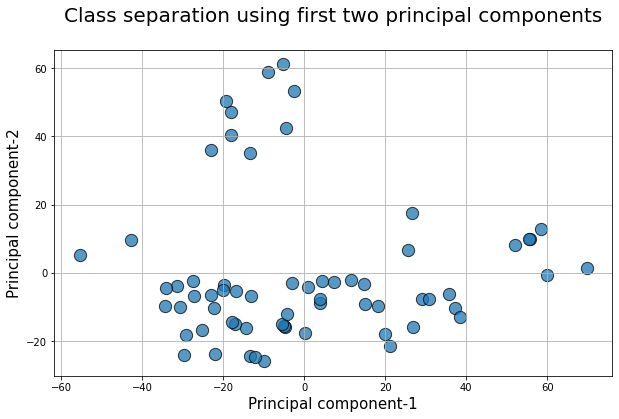

In [162]:
plt.figure(figsize=(10,6))
plt.scatter(x_scaled_pca[:,0],x_scaled_pca[:,1],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Class separation using first two principal components\n",fontsize=20)
plt.xlabel("Principal component-1",fontsize=15)
plt.ylabel("Principal component-2",fontsize=15)
plt.show()

creating 4 kmeans clusters on pca reduced dataset

In [163]:
kmc_pca = KMeans(n_clusters=4)
kmc_pca.fit(x_scaled_pca)

KMeans(n_clusters=4)

creating 4 agglomerative clusters on pca reduced dataset

In [164]:
agg_pca = AgglomerativeClustering(n_clusters=4)
agg_pca.fit(x_scaled_pca)

AgglomerativeClustering(n_clusters=4)

In [165]:
kmc_score_pca = silhouette_score(x_scaled_pca, kmc_pca.labels_, metric = 'euclidean')
agg_score_pca = silhouette_score(x_scaled_pca, agg_pca.labels_, metric = 'euclidean')

## Comparing results

In [166]:
comparison = (('Raw Data', kmc_score, agg_score),
      ('PCA reduced', kmc_score_pca, agg_score_pca))

In [167]:
comparison_df = pd.DataFrame(comparison, columns = ["Dataset", "KMeans", "Agglomerative"])
comparison_df.set_index('Dataset', inplace=True)
comparison_df

,KMeans,Agglomerative
Dataset,,
Raw Data,0.072419,0.076382
PCA reduced,0.131632,0.127447


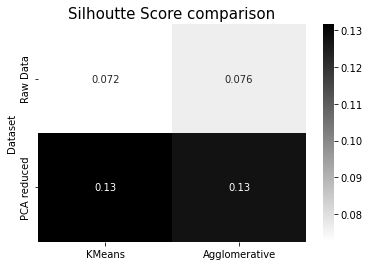

In [168]:
sil_comparison = sns.heatmap(comparison_df,cmap='binary', annot=True)
sil_comparison.set_title("Silhoutte Score comparison",fontsize=15)
plt.show()

Therefore K means clustering on PCA reduced dataset gives the best score

In [169]:
df_cluster = df.copy()

In [170]:
df_cluster['Cluster'] = kmc_pca.labels_
df_cluster

,1,2,3,4,5,6,7,8,9,10,...,6822,6823,6824,6825,6826,6827,6828,6829,6830,Cluster
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654980,...,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000,2
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285019,...,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039,2
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000,2
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-0.110000,-0.160000,0.095000,-0.350019,-0.300000,-1.150010,1.090000,-0.260000,-1.100000,2
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V60,-0.030000,-0.480000,0.070000,-0.700000,-0.195000,4.100000e-01,-0.240000,0.105000,-0.410000,0.875019,...,0.150000,-0.430000,0.145000,-0.090020,-0.020000,-1.390010,-1.150000,0.290000,1.190000,1
V61,-0.270000,0.630000,-0.100000,1.100000,1.045000,8.000000e-02,-0.090000,-0.675000,-0.310000,0.275019,...,0.200000,0.290000,-0.035000,0.279981,-0.160000,-0.020010,-0.640000,-0.370000,-0.430000,1
V62,0.210000,-0.620000,-0.150000,-1.330000,0.045000,-4.000000e-01,-0.390000,-0.675000,-0.360000,0.945020,...,-0.120000,0.850000,-0.125000,0.779980,0.390000,0.000000,0.160000,2.030000,3.940000,1
V63,-0.050000,0.140000,-0.090000,-1.260000,0.045000,-2.710505e-20,0.420000,-0.305000,0.310000,0.065019,...,-0.420000,-0.460000,-0.855000,-0.160020,-0.350000,-0.360010,-0.490000,0.010000,-1.720000,1


### Plotting Kmeans Cluster on PCA reduced dataset

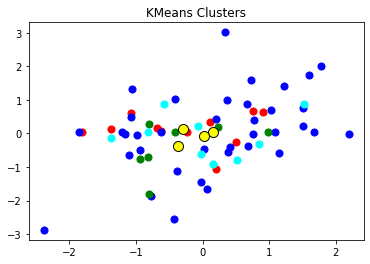

In [171]:
y_kmc = kmc.fit_predict(x_scaled)
plt.scatter(x_scaled[y_kmc==0, 0], x_scaled[y_kmc==0, 1], s=50, c='red', label ='KMC Cluster 1')
plt.scatter(x_scaled[y_kmc==1, 0], x_scaled[y_kmc==1, 1], s=50, c='blue', label ='KMC Cluster 2')
plt.scatter(x_scaled[y_kmc==2, 0], x_scaled[y_kmc==2, 1], s=50, c='green', label ='KMC Cluster 3')
plt.scatter(x_scaled[y_kmc==3, 0], x_scaled[y_kmc==3, 1], s=50, c='cyan', label ='KMC Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc.cluster_centers_[:, 0], kmc.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC')
plt.title('KMeans Clusters')
plt.show()

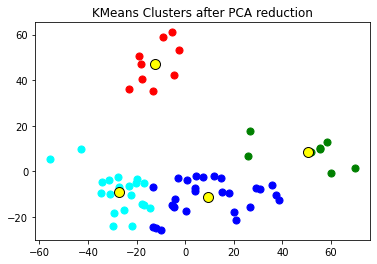

In [172]:
y_kmc_pca = kmc_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_kmc_pca==0, 0], x_scaled_pca[y_kmc_pca==0, 1], s=50, c='red', label ='KMC PCA Cluster 1')
plt.scatter(x_scaled_pca[y_kmc_pca==1, 0], x_scaled_pca[y_kmc_pca==1, 1], s=50, c='blue', label ='KMC PCA Cluster 2')
plt.scatter(x_scaled_pca[y_kmc_pca==2, 0], x_scaled_pca[y_kmc_pca==2, 1], s=50, c='green', label ='KMC PCA Cluster 3')
plt.scatter(x_scaled_pca[y_kmc_pca==3, 0], x_scaled_pca[y_kmc_pca==3, 1], s=50, c='cyan', label ='KMC PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
plt.scatter(kmc_pca.cluster_centers_[:, 0], kmc_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids KMC PCA')
plt.title('KMeans Clusters after PCA reduction')
plt.show()

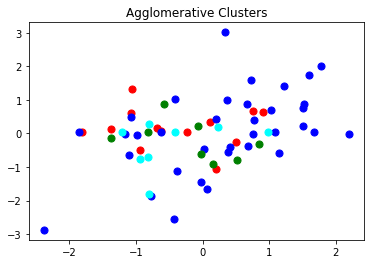

In [174]:
y_agg = agg.fit_predict(x_scaled)
plt.scatter(x_scaled[y_agg==0, 0], x_scaled[y_agg==0, 1], s=50, c='red', label ='Agg Cluster 1')
plt.scatter(x_scaled[y_agg==1, 0], x_scaled[y_agg==1, 1], s=50, c='blue', label ='Agg Cluster 2')
plt.scatter(x_scaled[y_agg==2, 0], x_scaled[y_agg==2, 1], s=50, c='green', label ='Agg Cluster 3')
plt.scatter(x_scaled[y_agg==3, 0], x_scaled[y_agg==3, 1], s=50, c='cyan', label ='Agg Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg.cluster_centers_[:, 0], agg.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg')
plt.title('Agglomerative Clusters')
plt.show()

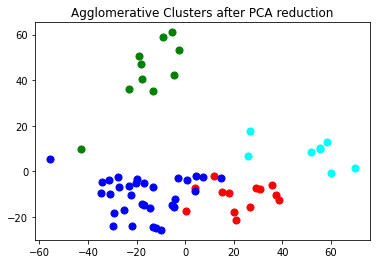

In [175]:
y_agg_pca = agg_pca.fit_predict(x_scaled_pca)
plt.scatter(x_scaled_pca[y_agg_pca==0, 0], x_scaled_pca[y_agg_pca==0, 1], s=50, c='red', label ='Agg PCA Cluster 1')
plt.scatter(x_scaled_pca[y_agg_pca==1, 0], x_scaled_pca[y_agg_pca==1, 1], s=50, c='blue', label ='Agg PCA Cluster 2')
plt.scatter(x_scaled_pca[y_agg_pca==2, 0], x_scaled_pca[y_agg_pca==2, 1], s=50, c='green', label ='Agg PCA Cluster 3')
plt.scatter(x_scaled_pca[y_agg_pca==3, 0], x_scaled_pca[y_agg_pca==3, 1], s=50, c='cyan', label ='Agg PCA Cluster 4')
#Plot the centroid. This time we're going to use the cluster centres  #attribute that returns here the coordinates of the centroid.
#plt.scatter(agg_pca.cluster_centers_[:, 0], agg_pca.cluster_centers_[:, 1], s=100, c='yellow',edgecolors='k', label = 'Centroids Agg PCA')
plt.title('Agglomerative Clusters after PCA reduction')
plt.show()